### 1. Import libraries

In [1]:
import math
import numpy
import pandas

import import_ipynb
import sklearn_models
import utility_figures
import Algorithm_of_MoTLM_with_known_points_of_interest

importing Jupyter notebook from sklearn_models.ipynb
importing Jupyter notebook from data_analysis.ipynb
importing Jupyter notebook from utility_figures.ipynb
importing Jupyter notebook from GeneralizationOfMixtureOfLinearExpertsIntoManyRegions.ipynb
importing Jupyter notebook from utility_functions.ipynb


### 2. Binary linear classifiers

#### 2.1. Generate Synthetic Data

REGION 1 n_samples : 386, REGION 2 n_samples : 234, REGION EXT n_samples : 772
Positive class size REGION 1 : 193, Negative class size outside region : 193
Positive class size REGION 2 : 117, Negative class size outside region : 117
Positive class size REGION EXT : 386, Negative class size outside region : 386


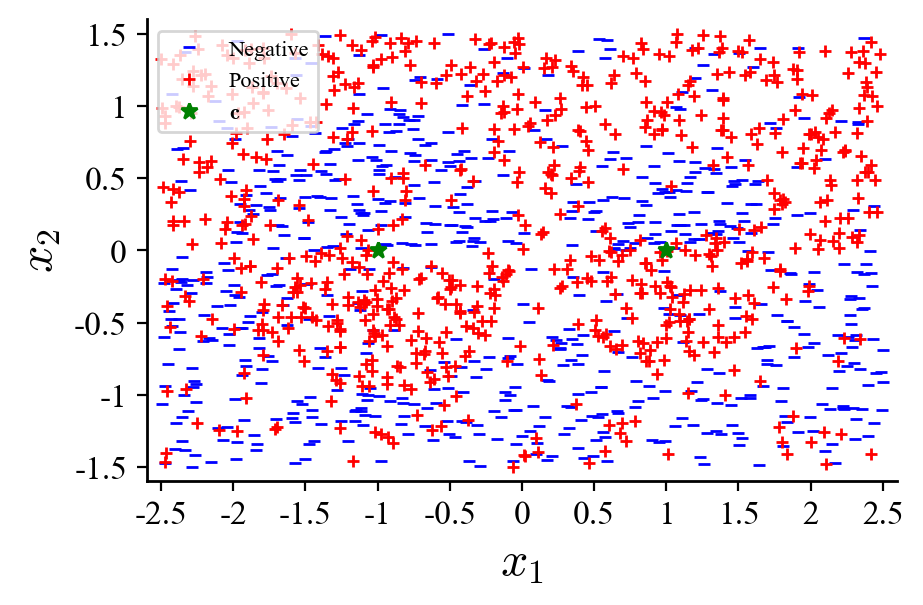

In [2]:
Ntrials = 2000
df_1, target_name, X0_1, BETA_1, situation_1 = utility_figures.DataGenerating_clf(Case=1, LengthRectangle=2.5, WidthRectangle=1.5, Ntrials=Ntrials, lang='en')
utility_figures.PlotDistribution_Synthetic_data_clf_gn(data=df_1, Xc=X0_1.values, situation=situation_1, learning_type_flag='Chosen', lang='en')

REGION 1 n_samples : 311, REGION 2 n_samples : 57, REGION 3 n_samples : 297, REGION EXT n_samples : 580
Positive class size REGION 1 : 142, Negative class size outside region : 169
Positive class size REGION 2 : 57, Negative class size outside region : 0
Positive class size REGION 3 : 152, Negative class size outside region : 145
Positive class size REGION EXT : 290, Negative class size outside region : 290


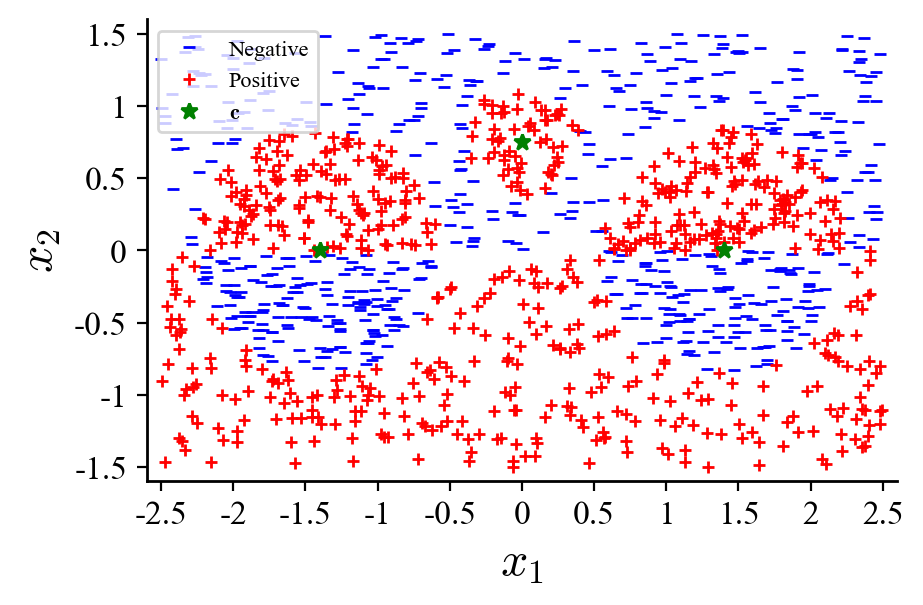

In [3]:
Ntrials = 2000
df_2, target_name, X0_2, BETA_2, situation_2 = utility_figures.DataGenerating_clf(Case=2, LengthRectangle=2.5, WidthRectangle=1.5, Ntrials=Ntrials, lang='en')
utility_figures.PlotDistribution_Synthetic_data_clf_gn(data=df_2, Xc=X0_2.values, situation=situation_2, learning_type_flag='Chosen', lang='en')

#### 2.2. Single Model (SVM Classifier)

##### Parameters Setting

In [ ]:
train_size=0.70
C_param=100
C_validation=True
times=10
return_flag='complex'

##### Situation 1

In [ ]:
# for rbf kernel
C_param_rbf, summary_rbf = sklearn_models.classifier_svm(df_1.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='rbf', C_param=C_param, C_validation=C_validation, times=times, return_flag=return_flag)
summary_rbf

In [ ]:
# for linear kernel
C_param, w, b, summary, X_tr, X_tt, ytrain_true, ytest_true, ytrain_pred, ytest_pred = sklearn_models.classifier_svm(df_1.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='linear', C_param=C_param, C_validation=C_validation, times=times, return_flag=return_flag)
summary

In [ ]:
utility_figures.visualize_hyperplane_gn(X=X_tr, y=ytrain_true, Xc=X0_1.values, v=w, b=b, situation=situation_1, jeu='Jeu d\'entraînement', lang='en')


In [ ]:
utility_figures.visualize_hyperplane_gn(X=X_tt, y=ytest_true, Xc=X0_1.values, v=w, b=b, situation=situation_1, jeu='Jeu de test', lang='en')

##### Situation 2

In [ ]:
# for rbf kernel
C_param_rbf_, summary_rbf_ = sklearn_models.classifier_svm(df_2.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='rbf', C_param=C_param, C_validation=C_validation, times=times, return_flag=return_flag)
summary_rbf_

In [ ]:
# for linear kernel
C_param_, w_, b_, summary_, X_tr_, X_tt_, ytrain_true_, ytest_true_, ytrain_pred_, ytest_pred_ = sklearn_models.classifier_svm(df_2.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='linear', C_param=C_param, C_validation=C_validation, times=times, return_flag=return_flag)
summary_

In [ ]:
utility_figures.visualize_hyperplane_gn(X=X_tr_, y=ytrain_true_, Xc=X0_2.values, v=w_, b=b_, situation=situation_2, jeu='Jeu d\'entraînement', lang='en')


In [ ]:
utility_figures.visualize_hyperplane_gn(X=X_tt_, y=ytest_true_, Xc=X0_2.values, v=w_, b=b_, situation=situation_2, jeu='Jeu de test', lang='en')


#### 2.3. Generalization Of Mixture Of Linear Experts Into Many Regions

##### Parameters Setting

In [4]:
train_size=0.70
lr=0.1
lambda_param=300
max_iters=2000
scale=False
lambda_validation=True
times=10#times
return_flag='complex'

##### Situation 1

In [5]:
X0_1_enc, lambda_param, W, w_ext, MU, mu_ext, K, TAU, BETA, summary, X_train, X_test, Mat_dists_train, Mat_dists_test, ytrain_true, ytest_true, ytrain_pred, ytest_pred = Algorithm_of_MoTLM_with_known_points_of_interest.Mixture_clf(df_1.copy(), target_name, X0_info=X0_1, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, scale=scale, lambda_validation=lambda_validation, times=times, return_flag=return_flag)


***************** Mixtures of transparent local models with known points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, class_weights = None, scale = False, lambda_validation = True, times = 10


Tuning Lambda (20 random restarts for each lambda) : 100%|█| 17/17 [01:52<00:00,
For Random Data Split = 10 …:  10%|█▎           | 1/10 [01:59<17:56, 119.61s/it]

W = [[-0.17956819 -3.82169361]
 [-0.33888533 -4.25494115]], MU = [-0.1017   0.23816], lambda_param = 1948.0
w_ext = [0.07659194 2.97252482], mu_ext = 0.014514
SIGMA = [0.001849 0.001333], sigma_ext = 0.004284


Tuning Lambda (20 random restarts for each lambda) : 100%|█| 17/17 [01:50<00:00,
For Random Data Split = 10 …:  20%|██▌          | 2/10 [03:50<15:16, 114.60s/it]

W = [[ 0.2571221  -2.79424755]
 [-0.94900526 -4.0315103 ]], MU = [0.11197  1.057014], lambda_param = 2313.25
w_ext = [0.18463099 3.47723505], mu_ext = -0.122248
SIGMA = [0.016    0.028403], sigma_ext = 0.250574


Tuning Lambda (20 random restarts for each lambda) : 100%|█| 17/17 [01:55<00:00,
For Random Data Split = 10 …:  30%|███▉         | 3/10 [05:46<13:27, 115.34s/it]

W = [[ 0.06908193 -2.49738431]
 [-0.60265749 -2.88802021]], MU = [-0.104921  0.460627], lambda_param = 974.0
w_ext = [0.19766464 4.34867867], mu_ext = -0.247354
SIGMA = [0.006507 0.002681], sigma_ext = 0.240822


Tuning Lambda (20 random restarts for each lambda) : 100%|█| 17/17 [01:49<00:00,
For Random Data Split = 10 …:  40%|█████▏       | 4/10 [07:37<11:20, 113.49s/it]

W = [[ 0.43673008 -3.91101809]
 [ 0.00542989 -4.36009256]], MU = [0.066065 0.112911], lambda_param = 2191.5
w_ext = [0.16476642 3.5851415 ], mu_ext = 0.021199
SIGMA = [0.005649 0.001785], sigma_ext = 6.9e-05


Tuning Lambda (20 random restarts for each lambda) : 100%|█| 17/17 [01:50<00:00,
For Random Data Split = 10 …:  50%|██████▌      | 5/10 [09:28<09:22, 112.46s/it]

W = [[-0.03157269 -4.84464893]
 [-0.24124402 -4.1196902 ]], MU = [-0.0585    0.210615], lambda_param = 1461.0
w_ext = [0.0682264  3.18238705], mu_ext = -0.3387
SIGMA = [0.001196 0.001143], sigma_ext = 0.002406


Tuning Lambda (20 random restarts for each lambda) : 100%|█| 17/17 [01:49<00:00,
For Random Data Split = 10 …:  60%|███████▊     | 6/10 [11:17<07:25, 111.47s/it]

W = [[-0.18753773 -2.78992853]
 [-0.22428936 -2.31267083]], MU = [-0.147393  0.371285], lambda_param = 487.0
w_ext = [0.14837953 3.78772453], mu_ext = -0.286353
SIGMA = [0.005196 0.011444], sigma_ext = 0.238985


Tuning Lambda (20 random restarts for each lambda) : 100%|█| 17/17 [01:50<00:00,
For Random Data Split = 10 …:  70%|█████████    | 7/10 [13:08<05:33, 111.31s/it]

W = [[ 0.17645282 -3.96016404]
 [-0.24741298 -3.70621266]], MU = [0.055693 0.216489], lambda_param = 974.0
w_ext = [0.22952882 3.03465137], mu_ext = 0.113461
SIGMA = [0.002013 0.001773], sigma_ext = 0.009901


Tuning Lambda (20 random restarts for each lambda) : 100%|█| 17/17 [01:50<00:00,
For Random Data Split = 10 …:  80%|██████████▍  | 8/10 [15:00<03:42, 111.39s/it]

W = [[ 0.02979002 -3.13179955]
 [-0.23023636 -3.36472337]], MU = [-0.060988  0.174981], lambda_param = 852.25
w_ext = [0.1469958  3.08499765], mu_ext = 0.136028
SIGMA = [0.004161 0.001449], sigma_ext = 0.02128


Tuning Lambda (20 random restarts for each lambda) : 100%|█| 17/17 [01:53<00:00,
For Random Data Split = 10 …:  90%|███████████▋ | 9/10 [16:54<01:52, 112.12s/it]

W = [[ 0.21282604 -2.9075536 ]
 [-0.5192917  -3.10990384]], MU = [0.208851 0.534614], lambda_param = 730.5
w_ext = [-0.16924021  2.60689193], mu_ext = 0.280843
SIGMA = [0.005588 0.003046], sigma_ext = 0.006153


Tuning Lambda (20 random restarts for each lambda) : 100%|█| 17/17 [01:49<00:00,
For Random Data Split = 10 …: 100%|████████████| 10/10 [18:43<00:00, 112.38s/it]

W = [[ 0.28490952 -3.53559004]
 [ 0.03235691 -4.17133654]], MU = [0.05835  0.112892], lambda_param = 2435.0
w_ext = [0.17492324 2.77643064], mu_ext = 0.006898
SIGMA = [0.004426 0.002422], sigma_ext = 0.004877


In [6]:
summary

,Accuracy,F1_score,Precision_score,Gibbs_risk,Risk_bound
Training set,78.337,78.265,72.256,0.3171,0.3549
Validation set,80.095,80.168,74.389,0.3086,0.3464
Testing set,77.943,77.967,71.602,0.3191,0.3569


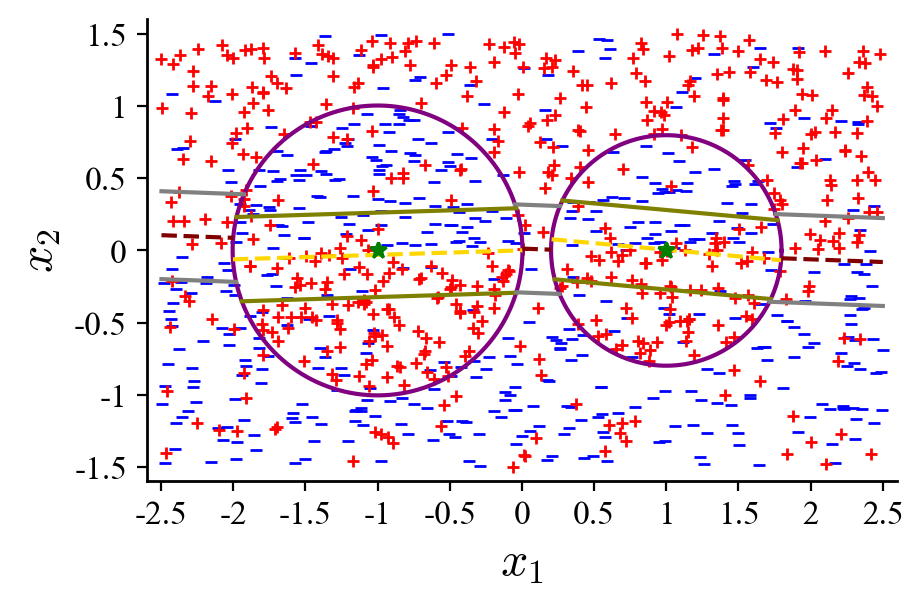

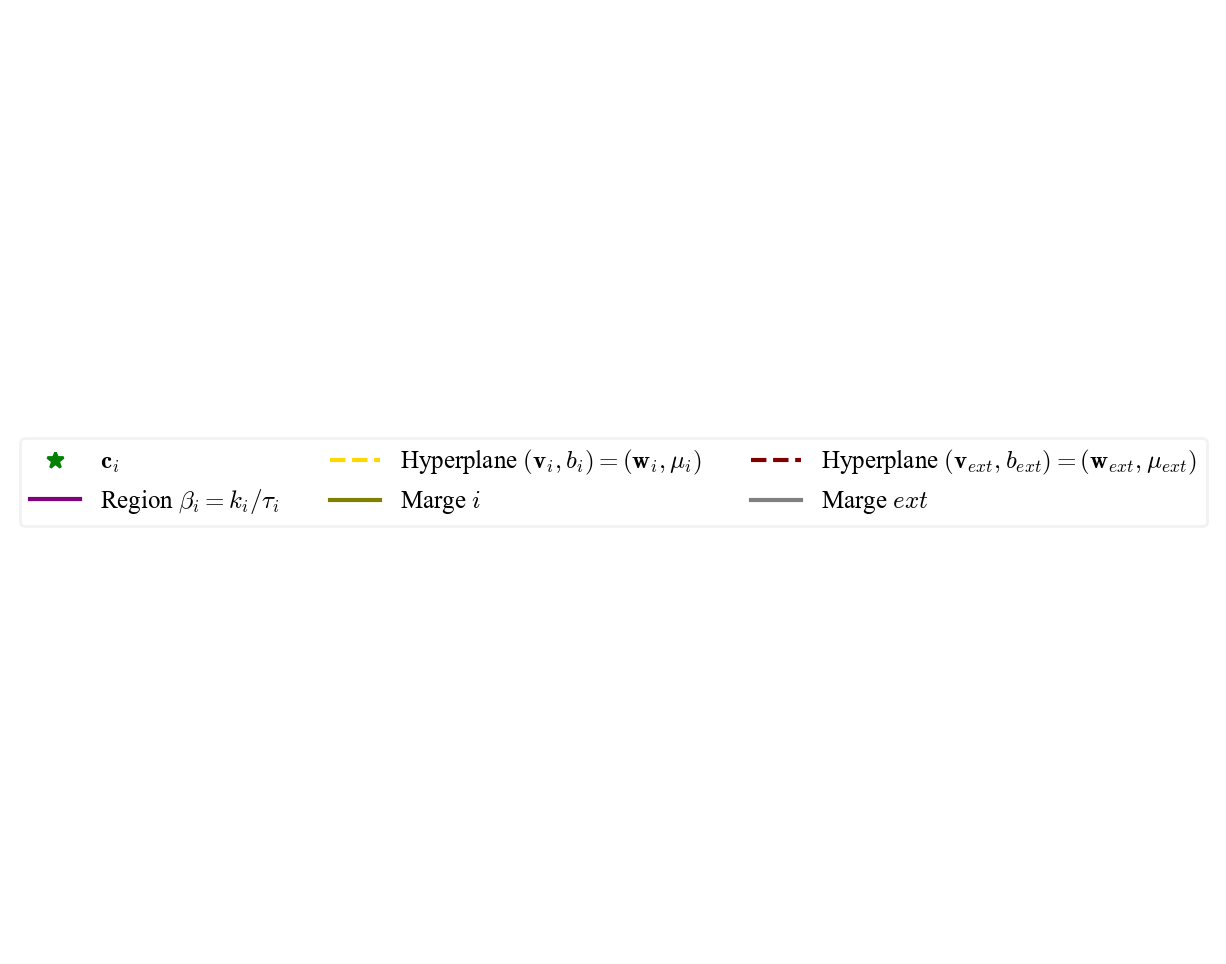

In [7]:
utility_figures.visualize_hybrid_hyperplane_gn(X=X_train, y=ytrain_true, Xcenter=X0_1_enc, dist_type='euclidean', Mat_dists=Mat_dists_train, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA, situation=situation_1, jeu='Jeu d\'entraînement', option=False, learning_type_flag='Chosen', lang='en')

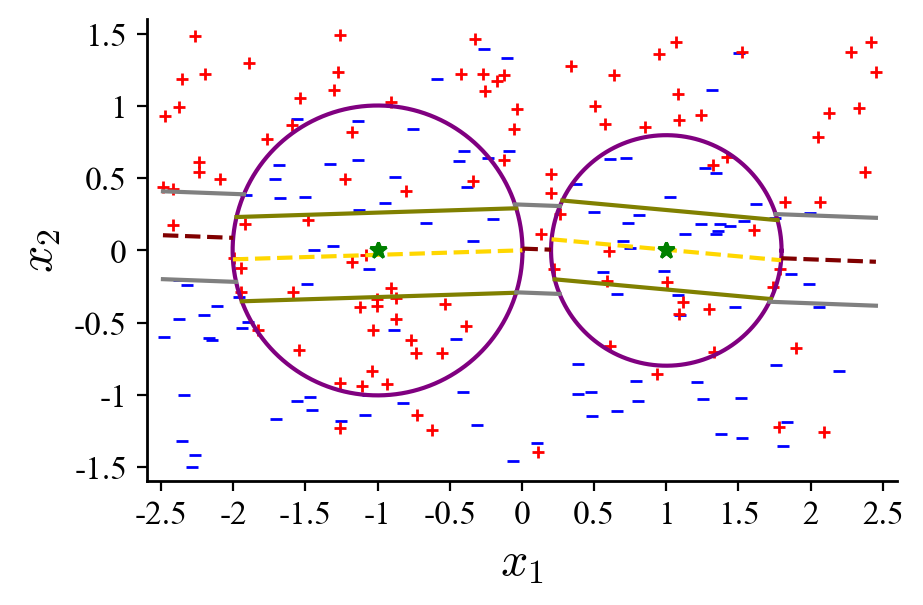

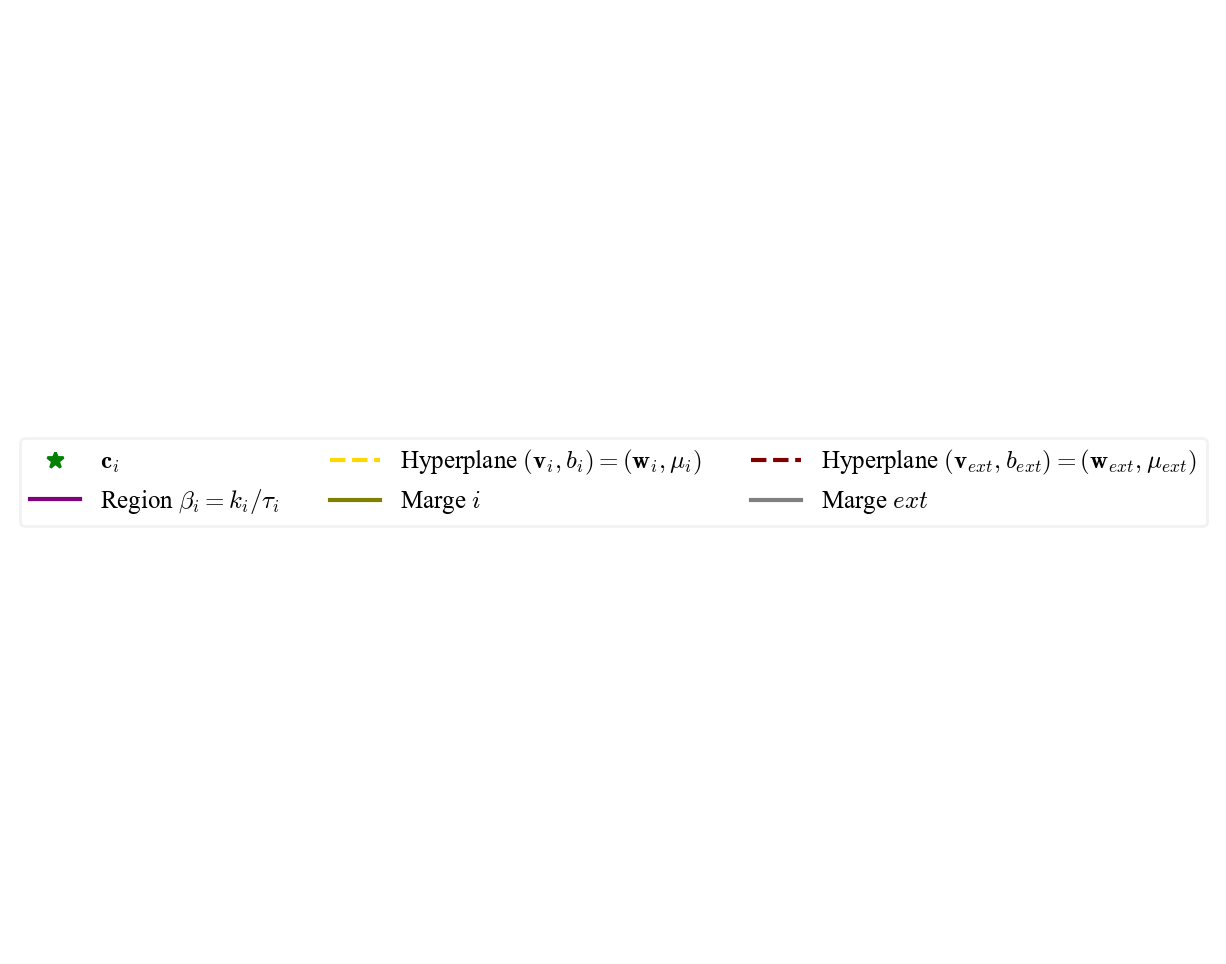

In [8]:
utility_figures.visualize_hybrid_hyperplane_gn(X=X_test, y=ytest_true, Xcenter=X0_1_enc, dist_type='euclidean', Mat_dists=Mat_dists_test, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA, situation=situation_1, jeu='Jeu de test', option=False, learning_type_flag='Chosen', lang='en')

In [ ]:
n = 5
list_of_n_points = numpy.zeros(n)
Acc_train, Acc_val, Acc_test = numpy.zeros(n), numpy.zeros(n), numpy.zeros(n)
Risk_train, Risk_val, Risk_test = numpy.zeros(n), numpy.zeros(n), numpy.zeros(n)

for i in numpy.arange(1, n+1):
    print(f'***************************** For n = {i} ********************************')
    if i == 1:
        X0_1 = pandas.DataFrame({"var_1": [-1], "var_2": [0]})
    elif i == 2:
        new_row = pandas.DataFrame({"var_1": [1], "var_2": [0]})
        X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    elif i == 3:
        new_row = pandas.DataFrame({"var_1": [-2], "var_2": [-1]})
        X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    elif i == 4:
        new_row = pandas.DataFrame({"var_1": [2], "var_2": [1]})
        X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    elif i == 5:
        new_row = pandas.DataFrame({"var_1": [-1], "var_2": [0.5]})
        X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    #elif i == 6:
    #    new_row = pandas.DataFrame({"var_1": [-1], "var_2": [-0.5]})
    #    X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    #elif i == 7:
    #    new_row = pandas.DataFrame({"var_1": [0.5], "var_2": [0]})
    #    X0_1 = pandas.concat([X0_1, new_row], ignore_index=True)
    
    X0_1_enc, lambda_param, W, w_ext, MU, mu_ext, K, TAU, BETA, summary = Algorithm_of_MoTLM_with_known_points_of_interest.Mixture_clf(df_1.copy(), target_name, X0_info=X0_1, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, scale=scale, lambda_validation=lambda_validation, times=times, return_flag='simple')
    list_of_n_points[i-1] = i
    Acc_train[i-1], Acc_val[i-1], Acc_test[i-1] = summary['Accuracy'][summary.index[0]], summary['Accuracy'][summary.index[1]], summary['Accuracy'][summary.index[2]]
    Risk_train[i-1], Risk_val[i-1], Risk_test[i-1] = summary['Risk_bound'][summary.index[0]], summary['Risk_bound'][summary.index[1]], summary['Risk_bound'][summary.index[2]]

In [ ]:
utility_figures.influence_of_number_of_points_of_interest(list_of_n_points=list_of_n_points, perform_train=Acc_train, perform_val=Acc_val, perform_test=Acc_test, situation=situation_1, perform='Accuracy', flag='clf', learning_type_flag='Chosen', lang='en')


In [ ]:
utility_figures.influence_of_number_of_points_of_interest(list_of_n_points=list_of_n_points, perform_train=Risk_train, perform_val=Risk_val, perform_test=Risk_test, situation=situation_1, perform='Bound', flag='clf', learning_type_flag='Chosen', lang='en')


##### Situation 2

In [9]:
X0_2_enc, lambda_param_, W_, w_ext_, MU_, mu_ext_, K_, TAU_, BETA_, summary_, X_train_, X_test_, Mat_dists_train_, Mat_dists_test_, ytrain_true_, ytest_true_, ytrain_pred_, ytest_pred_ = Algorithm_of_MoTLM_with_known_points_of_interest.Mixture_clf(df_2.copy(), target_name, X0_info=X0_2, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, scale=scale, lambda_validation=lambda_validation, times=times, return_flag=return_flag)


***************** Mixtures of transparent local models with known points of interest *****************
Training_set = 70%, Validation_set = 15%, Test_set = 15%, class_weights = None, scale = False, lambda_validation = True, times = 10


Tuning Lambda (30 random restarts for each lambda) : 100%|█| 17/17 [03:25<00:00,
For Random Data Split = 10 …:  10%|█▎           | 1/10 [03:26<31:00, 206.70s/it]

W = [[ 0.21692022  5.65869632]
 [ 0.08130716  0.62953719]
 [-0.29802381  5.98495892]], MU = [0.329889 1.718679 0.556283], lambda_param = 1379.0833333333333
w_ext = [-0.09238658 -4.30745893], mu_ext = -0.064288
SIGMA = [8.758e-03 2.290e-04 6.700e-05], sigma_ext = 0.000154


Tuning Lambda (30 random restarts for each lambda) : 100%|█| 17/17 [03:17<00:00,
For Random Data Split = 10 …:  20%|██▌          | 2/10 [06:45<26:56, 202.06s/it]

W = [[0.28840339 5.64920715]
 [0.02830387 0.86675133]
 [0.09095042 5.26096993]], MU = [0.290761 1.182028 0.094249], lambda_param = 1451.6666666666665
w_ext = [-0.03017277 -3.70764851], mu_ext = -0.08189
SIGMA = [0.000238 0.000116 0.000626], sigma_ext = 0.000934


Tuning Lambda (30 random restarts for each lambda) : 100%|█| 17/17 [03:26<00:00,
For Random Data Split = 10 …:  30%|███▉         | 3/10 [10:12<23:50, 204.39s/it]

W = [[ 0.3361146   5.0617948 ]
 [-0.04102846  0.64907899]
 [ 0.02075701  6.25153937]], MU = [0.274474 1.551277 0.055674], lambda_param = 1306.5
w_ext = [-0.00694446 -3.64898835], mu_ext = -0.095444
SIGMA = [0.00888  0.002057 0.000627], sigma_ext = 0.001234


Tuning Lambda (30 random restarts for each lambda) : 100%|█| 17/17 [03:17<00:00,
For Random Data Split = 10 …:  40%|█████▏       | 4/10 [13:30<20:10, 201.78s/it]

W = [[0.34012229 4.3796841 ]
 [0.00764294 1.0474082 ]
 [0.0768389  4.95239632]], MU = [0.261536 1.162161 0.072613], lambda_param = 1379.0833333333333
w_ext = [-0.09769445 -4.03252405], mu_ext = -0.157887
SIGMA = [1.346e-03 5.000e-06 4.660e-04], sigma_ext = 0.000441


Tuning Lambda (30 random restarts for each lambda) : 100%|█| 17/17 [03:20<00:00,
For Random Data Split = 10 …:  50%|██████▌      | 5/10 [16:51<16:48, 201.68s/it]

W = [[0.02320248 4.52732798]
 [0.01811349 0.96168462]
 [0.02118216 5.06763554]], MU = [-0.138345  1.157689  0.034007], lambda_param = 1233.9166666666665
w_ext = [-0.0141424  -3.15837877], mu_ext = -0.072083
SIGMA = [0.00117  0.045469 0.001166], sigma_ext = 0.000886


Tuning Lambda (30 random restarts for each lambda) : 100%|█| 17/17 [03:18<00:00,
For Random Data Split = 10 …:  60%|███████▊     | 6/10 [20:11<13:23, 201.00s/it]

W = [[ 4.28168680e-01  5.86779669e+00]
 [-4.09319824e-03  4.14683755e-01]
 [ 2.70125796e-01  5.80334729e+00]], MU = [ 0.45798   1.911849 -0.043815], lambda_param = 1451.6666666666665
w_ext = [-0.00714948 -4.30575177], mu_ext = -0.179808
SIGMA = [9.20e-05 2.90e-05 7.47e-04], sigma_ext = 0.00013


Tuning Lambda (30 random restarts for each lambda) : 100%|█| 17/17 [03:20<00:00,
For Random Data Split = 10 …:  70%|█████████    | 7/10 [23:32<10:02, 200.97s/it]

W = [[0.07325832 4.17578261]
 [0.04478667 0.98339815]
 [0.17077657 4.15841871]], MU = [ 0.018069  1.089133 -0.16953 ], lambda_param = 798.4166666666666
w_ext = [-0.10538829 -3.20130367], mu_ext = -0.097396
SIGMA = [0.001172 0.030199 0.001225], sigma_ext = 0.000698


Tuning Lambda (30 random restarts for each lambda) : 100%|█| 17/17 [03:26<00:00,
For Random Data Split = 10 …:  80%|██████████▍  | 8/10 [26:59<06:45, 202.96s/it]

W = [[ 0.17818685  4.51411803]
 [-0.01398181  1.065835  ]
 [ 0.10881456  5.40803897]], MU = [0.007565 1.140348 0.217981], lambda_param = 1379.0833333333333
w_ext = [-0.0629908  -4.34374859], mu_ext = -0.005233
SIGMA = [0.002686 0.037668 0.000358], sigma_ext = 0.000663


Tuning Lambda (30 random restarts for each lambda) : 100%|█| 17/17 [03:22<00:00,
For Random Data Split = 10 …:  90%|███████████▋ | 9/10 [30:22<03:22, 202.89s/it]

W = [[ 0.16250631  4.58069013]
 [ 0.02875175  0.87004846]
 [-0.12930898  5.0952117 ]], MU = [0.099687 1.154208 0.258594], lambda_param = 1233.9166666666665
w_ext = [-0.15302021 -3.13494898], mu_ext = -0.00946
SIGMA = [0.001161 0.028165 0.001621], sigma_ext = 0.002929


Tuning Lambda (30 random restarts for each lambda) : 100%|█| 17/17 [03:20<00:00,
For Random Data Split = 10 …: 100%|████████████| 10/10 [33:43<00:00, 202.39s/it]

W = [[ 2.38736833e-01  5.43789505e+00]
 [-8.56018266e-04  1.12882674e+00]
 [ 6.03721631e-02  5.35012637e+00]], MU = [0.142771 1.212764 0.20396 ], lambda_param = 1233.9166666666665
w_ext = [ 0.04031478 -3.67132672], mu_ext = -0.030107
SIGMA = [0.000135 0.000237 0.000251], sigma_ext = 0.000235


In [10]:
summary_

,Accuracy,F1_score,Precision_score,Gibbs_risk,Risk_bound
Training set,97.727,97.787,96.789,0.1699,0.2328
Validation set,97.862,97.931,96.729,0.1730,0.2358
Testing set,96.417,96.527,95.191,0.1762,0.2391


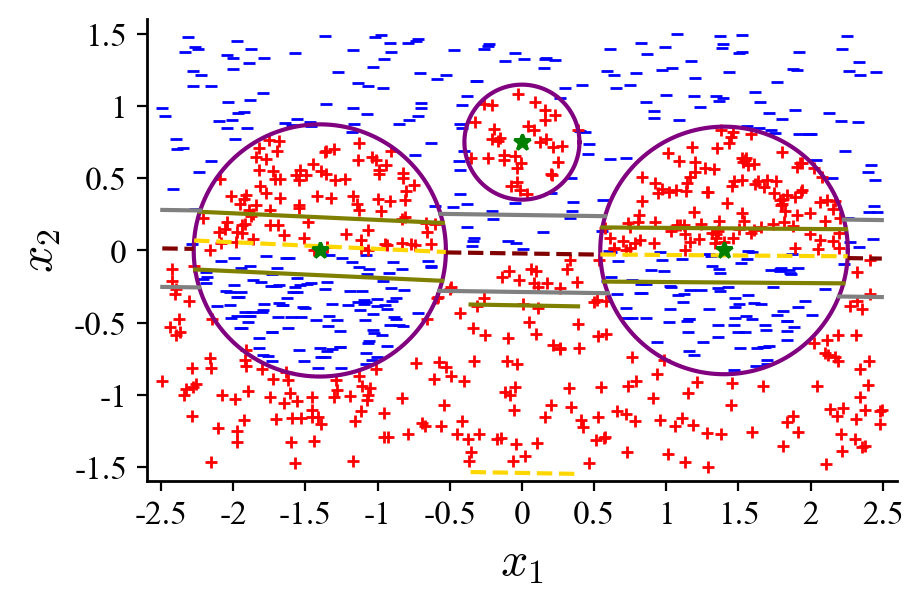

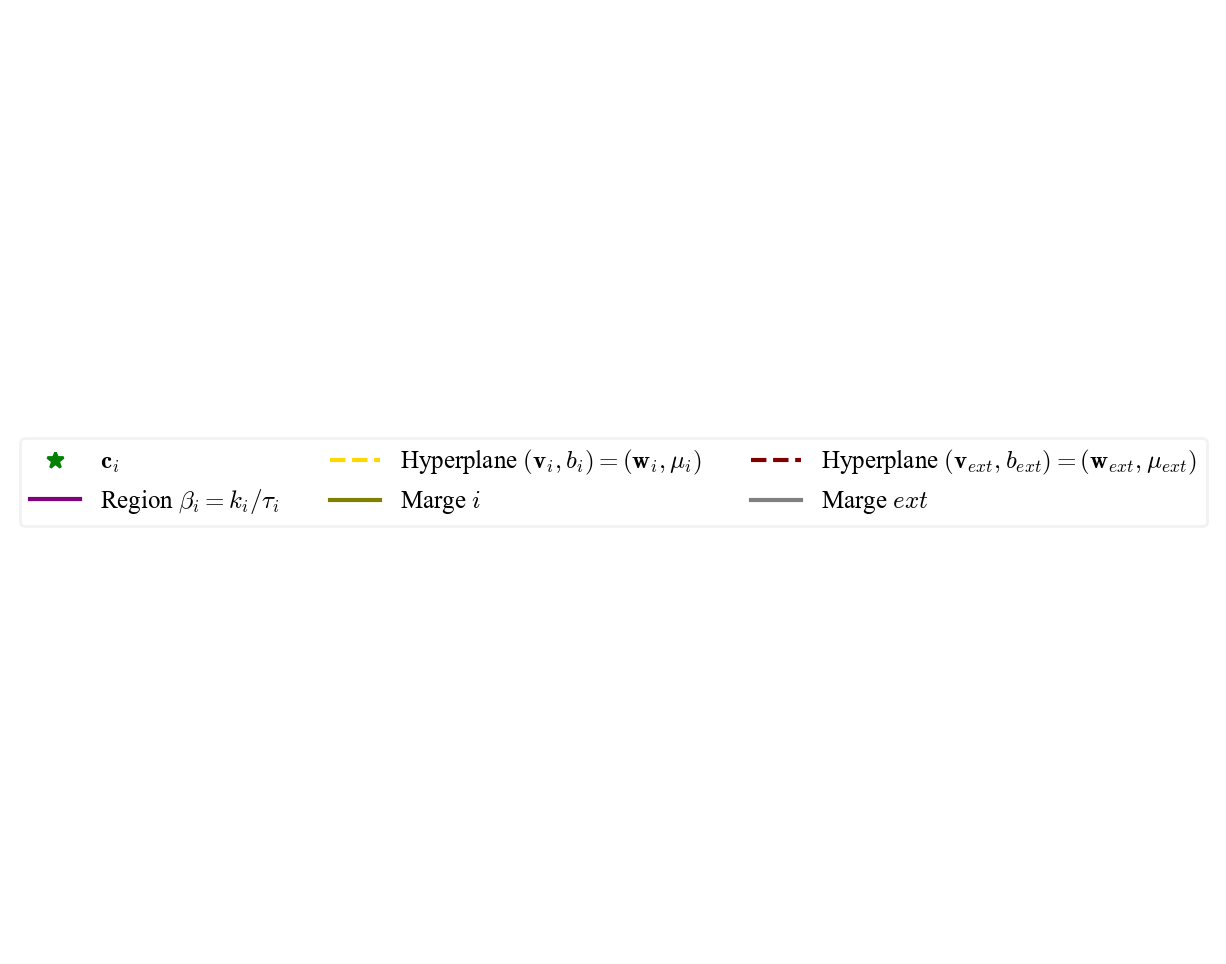

In [11]:
utility_figures.visualize_hybrid_hyperplane_gn(X=X_train_, y=ytrain_true_, Xcenter=X0_2_enc, dist_type='euclidean', Mat_dists=Mat_dists_train_, V=W_, v_ext=w_ext_, B=MU_, b_ext=mu_ext_, BETA=BETA_, situation=situation_2, jeu='Jeu d\'entraînement', option=False, learning_type_flag='Chosen', lang='en')

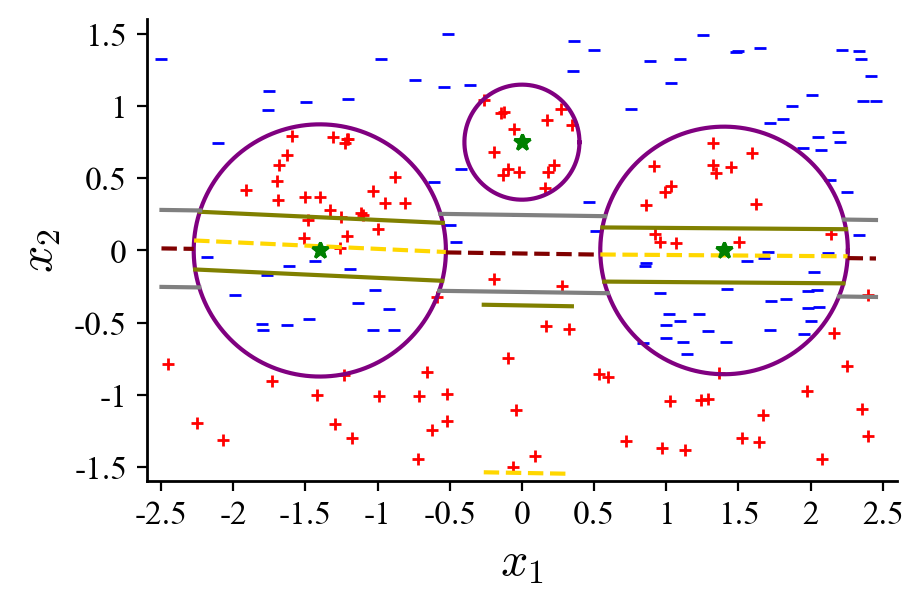

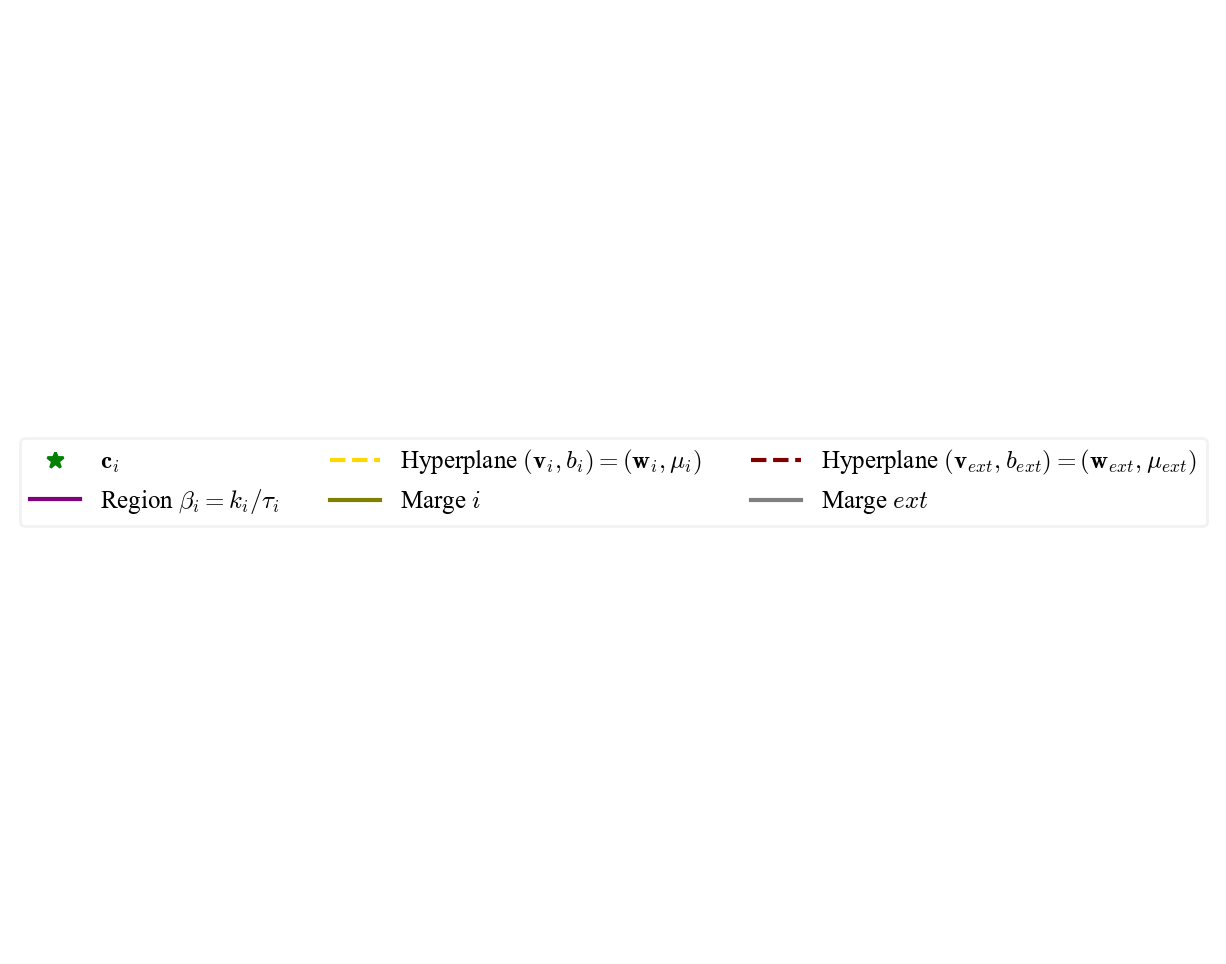

In [12]:
utility_figures.visualize_hybrid_hyperplane_gn(X=X_test_, y=ytest_true_, Xcenter=X0_2_enc, dist_type='euclidean', Mat_dists=Mat_dists_test_, V=W_, v_ext=w_ext_, B=MU_, b_ext=mu_ext_, BETA=BETA_, situation=situation_2, jeu='Jeu de test', option=False, learning_type_flag='Chosen', lang='en')

### 3. Linear regression

#### 3.1. Generate Synthetic Data

In [ ]:
Ntrials = 500
df_1, target_name, X0_1, Y0_1, BETA_1, situation_1 = utility_figures.DataGenerating_reg(Case=1, Ntrials=Ntrials, lang='en')
utility_figures.PlotDistribution_Synthetic_data_reg_gn(data=df_1, Xc=X0_1.values, Yc=Y0_1, situation=situation_1, learning_type_flag='Chosen', lang='en')

In [ ]:
Ntrials = 500
df_2, target_name, X0_2, Y0_2, BETA_2, situation_2 = utility_figures.DataGenerating_reg(Case=2, Ntrials=Ntrials, lang='en')
utility_figures.PlotDistribution_Synthetic_data_reg_gn(data=df_2, Xc=X0_2.values, Yc=Y0_2, situation=situation_2, learning_type_flag='Chosen', lang='en')

#### 3.2. Single Model (Linear regression)

##### Parameters Setting

In [ ]:
train_size=0.70
C_param=100
C_validation=True
times=times
check_multicollinearity=True

##### Situation 1

In [ ]:
summary = sklearn_models.kernel_regression(df_1.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='rbf', C_param=C_param, C_validation=C_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag='simple')
summary

In [ ]:
w, b, summary, X_tr, X_tt, ytrain_true, ytest_true, ytrain_pred, ytest_pred = sklearn_models.linear_regression(df_1.copy(), target_name, synthetic_data_flag=True, train_size=train_size, times=times, check_multicollinearity=check_multicollinearity, return_flag='complex')
summary

In [ ]:
xmin, xmax, ymin, ymax = utility_figures.get_xlimit_ylimit(X=X_tr, y=ytrain_true, w=w, b=b)
utility_figures.visualize_lr_reg_gn(X=X_tr, y=ytrain_true, Xc=X0_1.values, Yc=Y0_1, w=w, b=b, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, situation=situation_1, jeu='Apprentissage', lang='en')


In [ ]:
utility_figures.visualize_lr_reg_gn(X=X_tt, y=ytest_true, Xc=X0_1.values, Yc=Y0_1, w=w, b=b, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, situation=situation_1, jeu='Tester', lang='en')

##### Situation 2

In [ ]:
summary_ = sklearn_models.kernel_regression(df_2.copy(), target_name, synthetic_data_flag=True, train_size=train_size, kernel='rbf', C_param=C_param, C_validation=C_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag='simple')
summary_

In [ ]:
w_, b_, summary_, X_tr_, X_tt_, ytrain_true_, ytest_true_, ytrain_pred_, ytest_pred_ = sklearn_models.linear_regression(df_2.copy(), target_name, synthetic_data_flag=True, train_size=train_size, times=times, check_multicollinearity=check_multicollinearity, return_flag='complex')
summary_

In [ ]:
xmin_, xmax_, ymin_, ymax_ = utility_figures.get_xlimit_ylimit(X=X_tr_, y=ytrain_true_, w=w_, b=b_)
utility_figures.visualize_lr_reg_gn(X=X_tr_, y=ytrain_true_, Xc=X0_2.values, Yc=Y0_2, w=w_, b=b_, xmin=xmin_, xmax=xmax_, ymin=ymin_, ymax=ymax_, situation=situation_2, jeu='Apprentissage', lang='en')

In [ ]:
utility_figures.visualize_lr_reg_gn(X=X_tt_, y=ytest_true_, Xc=X0_2.values, Yc=Y0_2, w=w_, b=b_, xmin=xmin_, xmax=xmax_, ymin=ymin_, ymax=ymax_, situation=situation_2, jeu='Tester', lang='en')

#### 3.3. Generalization Of Mixture Of Linear Experts Into Many Regions

##### Parameters Setting

In [ ]:
train_size=0.70
lr=0.1
lambda_param=100
max_iters=2000
scale=False
lambda_validation=True
times=10#times
check_multicollinearity=True
return_flag='complex'

##### Situation 1

In [ ]:
X0_1_enc, lambda_param, W, w_ext, MU, mu_ext, K, TAU, BETA, summary, X_train, X_test, Mat_dists_train, Mat_dists_test, ytrain_true, ytest_true, ytrain_pred, ytest_pred = Algorithm_of_MoTLM_with_known_points_of_interest.Mixture_reg(df_1.copy(), target_name, synthetic_data_flag=True, X0_info=X0_1, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, scale=scale, lambda_validation=lambda_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag=return_flag)


In [ ]:
summary

In [ ]:
xmin, xmax, ymin, ymax = utility_figures.get_xlimit_ylimit_hybrid_gn(X=X_train, y=ytrain_true, Xc=X0_1_enc, dist_type='euclidean', Mat_dists=Mat_dists_train, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA)
utility_figures.visualize_hybrid_lr_reg_gn(X=X_train, y=ytrain_true, Xc=X0_1_enc, Yc=Y0_1, dist_type='euclidean', Mat_dists=Mat_dists_train, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, situation=situation_1, jeu='Apprentissage', learning_type_flag='Chosen', lang='en')

In [ ]:
utility_figures.visualize_hybrid_lr_reg_gn(X=X_test, y=ytest_true, Xc=X0_1_enc, Yc=Y0_1, dist_type='euclidean', Mat_dists=Mat_dists_test, V=W, v_ext=w_ext, B=MU, b_ext=mu_ext, BETA=BETA, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, situation=situation_1, jeu='Tester', learning_type_flag='Chosen', lang='en')

##### Situation 2

In [ ]:
X0_2_enc, lambda_param_, W_, w_ext_, MU_, mu_ext_, K_, TAU_, BETA_, summary_, X_train_, X_test_, Mat_dists_train_, Mat_dists_test_, ytrain_true_, ytest_true_, ytrain_pred_, ytest_pred_ = Algorithm_of_MoTLM_with_known_points_of_interest.Mixture_reg(df_2.copy(), target_name, synthetic_data_flag=True, X0_info=X0_2, train_size=train_size, lr=lr, lambda_param=lambda_param, max_iters=max_iters, scale=scale, lambda_validation=lambda_validation, times=times, check_multicollinearity=check_multicollinearity, return_flag=return_flag)


In [ ]:
summary_

In [ ]:
xmin_, xmax_, ymin_, ymax_ = utility_figures.get_xlimit_ylimit_hybrid_gn(X=X_train_, y=ytrain_true_, Xc=X0_2_enc, dist_type='euclidean', Mat_dists=Mat_dists_train_, V=W_, v_ext=w_ext_, B=MU_, b_ext=mu_ext_, BETA=BETA_)
utility_figures.visualize_hybrid_lr_reg_gn(X=X_train_, y=ytrain_true_, Xc=X0_2_enc, Yc=Y0_2, dist_type='euclidean', Mat_dists=Mat_dists_train_, V=W_, v_ext=w_ext_, B=MU_, b_ext=mu_ext_, BETA=BETA_, xmin=xmin_, xmax=xmax_, ymin=ymin_, ymax=ymax_, situation=situation_2, jeu='Apprentissage', learning_type_flag='Chosen', lang='en')

In [ ]:
utility_figures.visualize_hybrid_lr_reg_gn(X=X_test_, y=ytest_true_, Xc=X0_2_enc, Yc=Y0_2, dist_type='euclidean', Mat_dists=Mat_dists_test_, V=W_, v_ext=w_ext_, B=MU_, b_ext=mu_ext_, BETA=BETA_, xmin=xmin_, xmax=xmax_, ymin=ymin_, ymax=ymax_, situation=situation_2, jeu='Tester', learning_type_flag='Chosen', lang='en')